In [63]:
# 1. Import thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [64]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_excel('../Dataset/ADAUSDT.xlsx')
df1=df.reset_index()['Close']

In [65]:
#đảo ngược dữ liệu
df1=df1[::-1]
df=df[::-1]

In [66]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [67]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [68]:
#in shape của từng tập dư liệu
print(train_data.shape, test_data.shape, val_data.shape)

#in head
print(df1[:5])


(1050, 1) (300, 1) (150, 1)
[[0.00985389]
 [0.01189263]
 [0.01359157]
 [0.01325178]
 [0.01223242]]


In [69]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [70]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [71]:
#in shape của từng tập dư liệu
print(X_train.shape, y_train.shape, X_val.shape, yval.shape, X_test.shape, ytest.shape)


(1019, 30) (1019,) (119, 30) (119,) (269, 30) (269,)


In [72]:
# # 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

#in shape của từng tập dư liệu
print(X_train.shape, X_test.shape, X_val.shape)

(1019, 30, 1) (269, 30, 1) (119, 30, 1)


In [73]:
#in dữ liệu
print(X_train[:1])

[[[0.00985389]
  [0.01189263]
  [0.01359157]
  [0.01325178]
  [0.01223242]
  [0.01325178]
  [0.01495073]
  [0.01461094]
  [0.01630989]
  [0.01664968]
  [0.0159701 ]
  [0.01664968]
  [0.02106694]
  [0.02310567]
  [0.02174652]
  [0.02276589]
  [0.02276589]
  [0.02276589]
  [0.02140673]
  [0.02038736]
  [0.0224261 ]
  [0.02038736]
  [0.02038736]
  [0.02038736]
  [0.02072715]
  [0.02004757]
  [0.02038736]
  [0.02004757]
  [0.01970778]
  [0.0190282 ]]]


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout #thêm thư viện Dropout để tránh overfitting
from tensorflow.keras.callbacks import EarlyStopping


# Tạo model
model = Sequential()

# Thêm một LSTM layer với số lượng unit là 50
input_shape = (X_train.shape[1], 1)
model.add(LSTM(50, return_sequences=True, input_shape=input_shape))

# Thêm một LSTM layer với số lượng unit là 50
model.add(LSTM(50))

# Thêm một Dense layer với 32 unit
model.add(Dense(32))

# Thêm một Dropout layer với 0.2 dropout rate
model.add(Dropout(0.2))

# Thêm một Dense layer với 5 unit
model.add(Dense(5))

# Thêm một Dense layer với 1 unit
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

#early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [75]:
#in shape của từng tập dư liệu
print(X_train.shape, X_test.shape, X_val.shape)

(1019, 30, 1) (269, 30, 1) (119, 30, 1)


In [76]:
model.fit(X_train,y_train,validation_data=(X_val,yval),epochs=150,batch_size=16,verbose=1,callbacks=[early_stop])

Epoch 1/150
64/64 [==============================] - 6s 30ms/step - loss: 0.0108 - val_loss: 1.2015e-04
Epoch 2/150
64/64 [==============================] - 1s 18ms/step - loss: 0.0039 - val_loss: 2.7341e-04
Epoch 3/150
64/64 [==============================] - 1s 19ms/step - loss: 0.0030 - val_loss: 1.6367e-04
Epoch 4/150
64/64 [==============================] - 1s 17ms/step - loss: 0.0028 - val_loss: 7.2300e-05
Epoch 5/150
64/64 [==============================] - 1s 17ms/step - loss: 0.0025 - val_loss: 2.3335e-04
Epoch 6/150
64/64 [==============================] - 1s 17ms/step - loss: 0.0023 - val_loss: 4.2123e-04
Epoch 7/150
64/64 [==============================] - 1s 19ms/step - loss: 0.0023 - val_loss: 4.9201e-05
Epoch 8/150
64/64 [==============================] - 1s 18ms/step - loss: 0.0021 - val_loss: 2.6020e-04
Epoch 9/150
64/64 [==============================] - 1s 19ms/step - loss: 0.0021 - val_loss: 4.1200e-05
Epoch 10/150
64/64 [==============================] - 1s 21ms/st

In [77]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

#in shape của từng tập dư liệu
print(train_predict.shape, y_pred.shape, y_pred_val.shape)

4/4 [==============================] - 0s 9ms/step
(1019, 1) (269, 1) (119, 1)


In [78]:
#in shape của từng tập dư liệu y real
print(y_train.shape, ytest.shape, yval.shape)


(1019,) (269,) (119,)


In [79]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

#in head
print(train_predict[:5])

[[0.03234038]
 [0.02986768]
 [0.02699707]
 [0.02861792]
 [0.02742748]]


In [80]:
#Chuẩn hóa ngược lại yval và ytest và y_train sau khi đã reshape
y_train = y_train.reshape(y_train.shape[0],1)
ytest = ytest.reshape(ytest.shape[0],1)
yval = yval.reshape(yval.shape[0],1)

y_train=scaler.inverse_transform(y_train)
ytest=scaler.inverse_transform(ytest)
yval=scaler.inverse_transform(yval)

#in head
print(y_train[:5])



[[0.076]
 [0.073]
 [0.078]
 [0.074]
 [0.072]]


In [81]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
import math
from sklearn.metrics import mean_squared_error
print('Train Mean Squared Error:', math.sqrt(mean_squared_error(y_train[:,0], train_predict[:,0])))
print('Test Mean Squared Error:', math.sqrt(mean_squared_error(ytest[:,0], y_pred[:,0])))
print('Val Mean Squared Error:', math.sqrt(mean_squared_error(yval[:,0], y_pred_val[:,0])))
print('Train Score: %.2f RMSE' % (math.sqrt(mean_squared_error(y_train[:,0], train_predict[:,0]))))
print('Test Score: %.2f RMSE' % (math.sqrt(mean_squared_error(ytest[:,0], y_pred[:,0]))))
print('Val Score: %.2f RMSE' % (math.sqrt(mean_squared_error(yval[:,0], y_pred_val[:,0]))))

    
    

Train Mean Squared Error: 0.07863433719496155
Test Mean Squared Error: 0.045556171413427576
Val Mean Squared Error: 0.04173321681430731
Train Score: 0.08 RMSE
Test Score: 0.05 RMSE
Val Score: 0.04 RMSE


In [82]:
# Chuẩn bị dữ liệu cho dự đoán tiếp theo
last_30_days = df1[-100:]
next_30_days = []


for i in range(30):
    # Tạo input sequence
    input_sequence = last_30_days[-time_step:]
    
    input_sequence = np.array(input_sequence)

    # Chuẩn hóa dữ liệu
    # input_sequence = scaler.transform(input_sequence.reshape(-1, 1))

    # Reshape lại dữ liệu
    input_sequence = input_sequence.reshape(1, input_sequence.shape[0], 1)
    print(input_sequence.shape)

    # Dự đoán giá tiếp theo
    next_day = model.predict(input_sequence)
    
    # Lưu giá dự đoán
    next_30_days.append(next_day[0][0])

    # Cập nhật input sequence
    last_30_days = np.append(last_30_days, next_day[0][0])

    # Xóa đi phần tử đầu tiên
    last_30_days = np.delete(last_30_days, 0)

    

# Đưa giá trở lại dạng ban đầu
# next_30_days = scaler.inverse_transform(np.array(next_30_days).reshape(-1, 1))


(1, 30, 1)
1/1 [==============================] - 0s 26ms/step
(1, 30, 1)
1/1 [==============================] - 0s 25ms/step
(1, 30, 1)
1/1 [==============================] - 0s 22ms/step
(1, 30, 1)
1/1 [==============================] - 0s 24ms/step
(1, 30, 1)
1/1 [==============================] - 0s 23ms/step
(1, 30, 1)
1/1 [==============================] - 0s 23ms/step
(1, 30, 1)
1/1 [==============================] - 0s 22ms/step
(1, 30, 1)
1/1 [==============================] - 0s 22ms/step
(1, 30, 1)
1/1 [==============================] - 0s 23ms/step
(1, 30, 1)
1/1 [==============================] - 0s 23ms/step
(1, 30, 1)
1/1 [==============================] - 0s 21ms/step
(1, 30, 1)
1/1 [==============================] - 0s 23ms/step
(1, 30, 1)
1/1 [==============================] - 0s 21ms/step
(1, 30, 1)
1/1 [==============================] - 0s 22ms/step
(1, 30, 1)
1/1 [==============================] - 0s 22ms/step
(1, 30, 1)
1/1 [==============================] - 0s 23

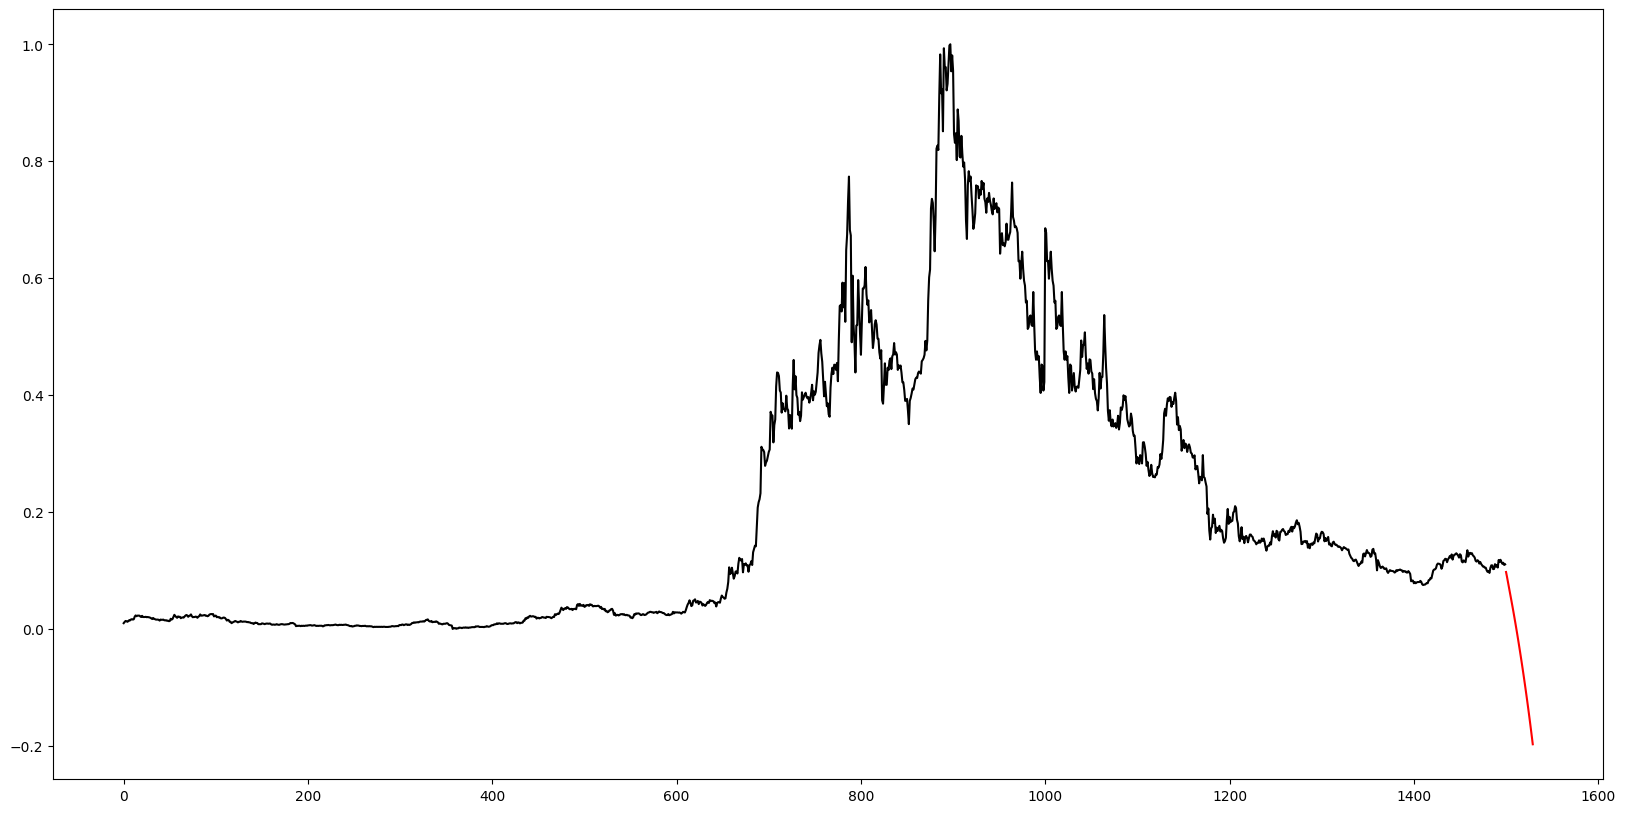

In [83]:
# Tạo mảng index tương ứng với các ngày
days = np.array(range(len(df), len(df) + len(next_30_days)))

# Vẽ biểu đồ
plt.figure(figsize=(20,10))
plt.plot(days, next_30_days, c='r', label='Next 30 days')
plt.plot(df1, c='black', label='Real data')
plt.show()


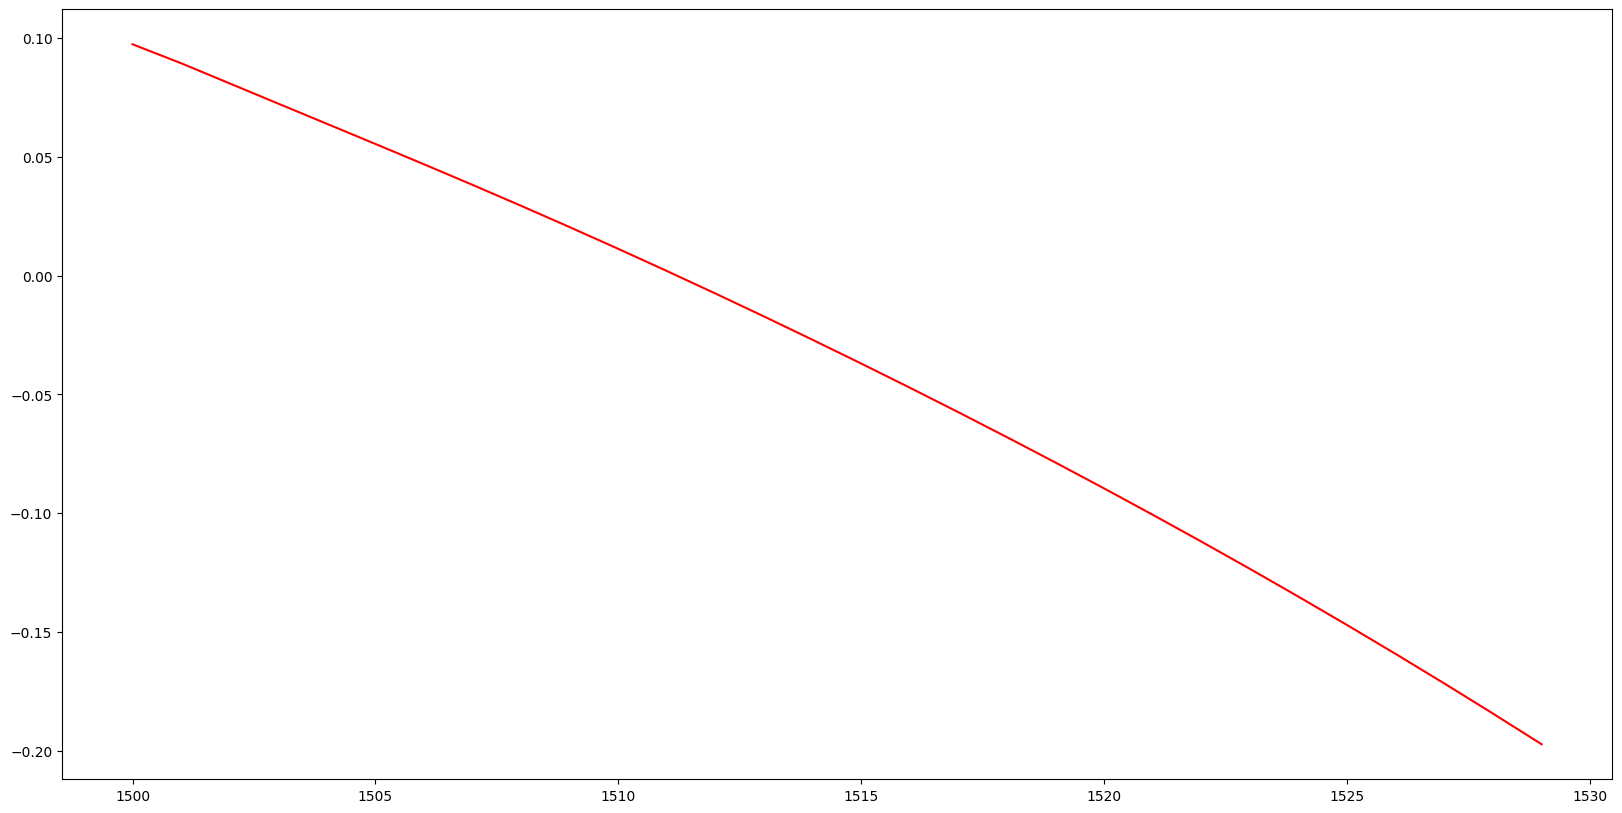

In [84]:
#vẽ next 30 days
plt.figure(figsize=(20,10))
plt.plot(days, next_30_days, c='r', label='Next 30 days')
plt.show()

In [85]:
train_data_inverse=scaler.inverse_transform(np.array(train_data).reshape(-1, 1))
test_data_inverse=scaler.inverse_transform(np.array(test_data).reshape(-1, 1))
val_data_inverse=scaler.inverse_transform(np.array(val_data).reshape(-1, 1))
next_30_days_inverse=scaler.inverse_transform(np.array(next_30_days).reshape(-1, 1))

# in dữ liệu
print(train_data_inverse[:5])
print(test_data_inverse[:5])
print(val_data_inverse[:5])
print(next_30_days_inverse[:5])

[[0.052]
 [0.058]
 [0.063]
 [0.062]
 [0.059]]
[[1.319]
 [1.309]
 [1.23 ]
 [1.28 ]
 [1.21 ]]
[[0.406]
 [0.406]
 [0.401]
 [0.386]
 [0.39 ]]
[[0.30960464]
 [0.2861086 ]
 [0.26108557]
 [0.23604624]
 [0.2110761 ]]


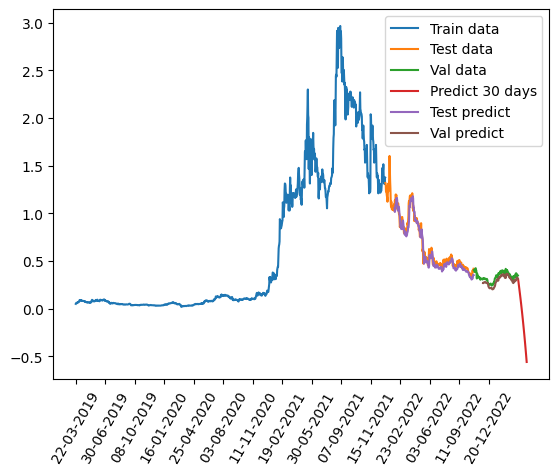

In [86]:
#vẽ y_train nối với ytest và y_val với index tương ứng

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
predict30_data_index = pd.RangeIndex(start=train_size+test_size+val_size, stop=train_size+test_size+val_size+30, step=1)

train_predict_index = pd.RangeIndex(start=0, stop=train_predict.shape[0], step=1)
y_pred_index = pd.RangeIndex(start=train_size+(train_size-train_predict.shape[0]), stop=train_size+(train_size-train_predict.shape[0])+y_pred.shape[0], step=1)
y_pred_val_index = pd.RangeIndex(start=train_size+(train_size-train_predict.shape[0])+y_pred.shape[0]+(val_size-y_pred_val.shape[0]), stop=train_size+(train_size-train_predict.shape[0])+y_pred.shape[0]+y_pred_val.shape[0]+(val_size-y_pred_val.shape[0]), step=1)

plt.plot(train_data_index, train_data_inverse,  label='Train data')
plt.plot(test_data_index, test_data_inverse, label='Test data')
plt.plot(val_data_index, val_data_inverse,  label='Val data')
plt.plot(predict30_data_index, next_30_days_inverse, label='Predict 30 days')
plt.plot(y_pred_index, y_pred, label='Test predict')
plt.plot(y_pred_val_index, y_pred_val,  label='Val predict')
# trục x là giá trị của cột Close time của df1
plt.xticks(np.arange(0, len(df1), 100), df['Close time'][0:len(df):100])
#xoay ngang giá trị của trục x
plt.xticks(rotation=60)
plt.legend()
plt.show()



